# Titanic - Predicting survival with Deep Learning 
César Muro.  

We are going to create a deep learning model that predicts which passengers survived the Titanic shipwreck. 
First, we perform an exploratory data analysis on the dataset. Then, we employ tensorflow and Keras to construct neural networks with different tunings as output activation functions and different loss functions.

We import the data from my github:

In [189]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
url="https://raw.githubusercontent.com/cmuro27/Machine_Learning_Projects_and_Notes/main/datasets/titanic_all_numeric.csv"
titanic=pd.read_csv(url)

and perform an exploratory data analysis (EDA) to our data. 


## Exploratory data analysis  
First, we look the characteristics of the dataframe

In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   survived                   891 non-null    int64  
 1   pclass                     891 non-null    int64  
 2   age                        891 non-null    float64
 3   sibsp                      891 non-null    int64  
 4   parch                      891 non-null    int64  
 5   fare                       891 non-null    float64
 6   male                       891 non-null    int64  
 7   age_was_missing            891 non-null    bool   
 8   embarked_from_cherbourg    891 non-null    int64  
 9   embarked_from_queenstown   891 non-null    int64  
 10  embarked_from_southampton  891 non-null    int64  
dtypes: bool(1), float64(2), int64(8)
memory usage: 70.6 KB


We have 891 non-null values. Our target variable is survived and we count with 10 features.  

In [98]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [126]:
titanic.survived.value_counts(1)

0    0.616162
1    0.383838
Name: survived, dtype: float64

We observe that just $38 %$ percent of the passengers survived.

In [90]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


By analyzing the descriptive statistics we find that mean age is 30 years. The majority of the people, around the 75%, was traveling alone and embarked in Southhampton. There were more men than women on the ship.

In [100]:
titanic.parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

Now, we explore visually the relations between distinct the features and the target variable

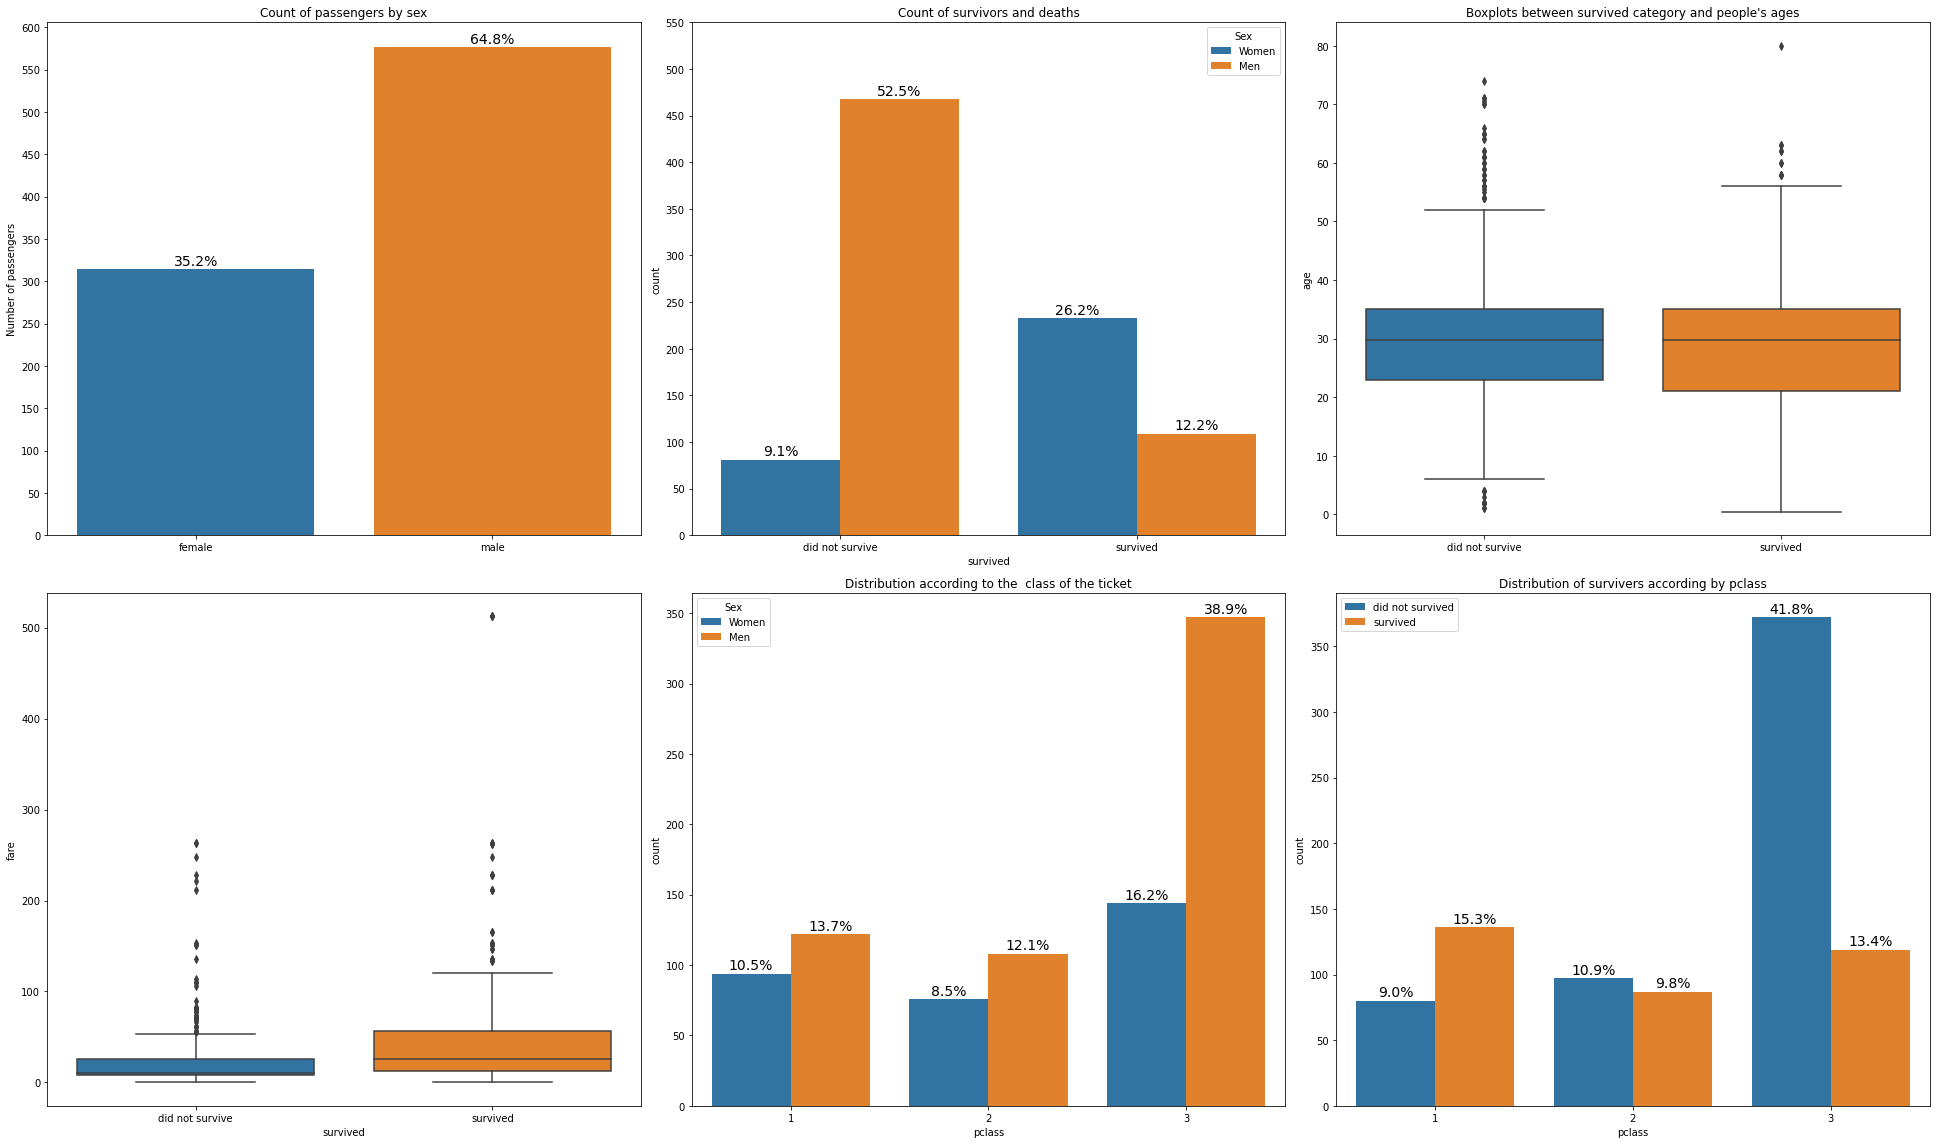

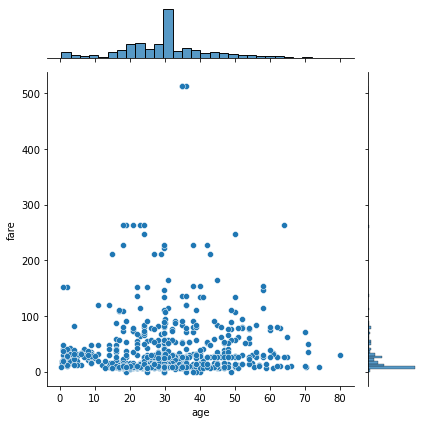

In [228]:
total=len(titanic)

fig, axes = plt.subplots(2,3,figsize=(27, 16))

sns.countplot(x='male',data=titanic,ax=axes[0,0])

axes[0,0].set(xticklabels = (['female', 'male']),
              title="Count of passengers by sex",
              xlabel=None,
              ylabel="Number of passengers",
              yticks=(np.arange(0,601,50))) 

for p in axes[0,0].patches:
    percentage=f'{100*p.get_height()/total:.1f}%\n'
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    axes[0,0].annotate(percentage,(x,y),ha='center',va='center',fontsize=14)

sns.countplot(x='survived',hue='male',data=titanic,ax=axes[0,1])

axes[0,1].legend(title='Sex', loc='upper right', labels=['Women', 'Men'])
axes[0,1].set(yticks=(np.arange(0,551,50)),
              title="Count of survivors and deaths",
              xticklabels=(['did not survive','survived']))

for p in axes[0,1].patches:
    percentage=f'{100*p.get_height()/total:.1f}%\n'
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    axes[0,1].annotate(percentage,(x,y),ha='center',va='center',fontsize=14)
sns.boxplot(ax=axes[0,2],x='survived',y='age',data=titanic)
axes[0,2].set(ylabel='age',title="Boxplots between survived category and people's ages",
              xlabel=None,
              xticklabels=(['did not survive','survived']))

sns.boxplot(ax=axes[1,0],
            x=titanic['survived'],
            y=titanic['fare'])

axes[1,0].set(xticklabels=(["did not survive","survived"]))

sns.countplot(ax=axes[1,1],hue=titanic.male,x=titanic.pclass)

axes[1,1].set(title="Distribution according to the  class of the ticket")

axes[1,1].legend(title="Sex",labels=["Women","Men"])

for p in axes[1,1].patches:
    percentage=f'{100*p.get_height()/total:.1f}%\n'
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    axes[1,1].annotate(percentage,(x,y),ha='center',va='center',fontsize=14)

sns.countplot(ax=axes[1,2],x='pclass',data=titanic,hue='survived')

axes[1,2].legend(labels=['did not survived','survived'])
axes[1,2].set(title="Distribution of survivers according by pclass")

for p in axes[1,2].patches:
    percentage=f'{100*p.get_height()/total:.1f}%\n'
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    axes[1,2].annotate(percentage,(x,y),ha='center',va='center',fontsize=14)
    
plt.tight_layout()
plt.show()
sns.jointplot(x=titanic.age,y=titanic.fare)
plt.tight_layout()
plt.show()

We observe that there were more women survivers than men, and you have more probabilities of survivng with a first ticket class.

In [231]:
pclass1=titanic[titanic['pclass']==1]
pclass2=titanic[titanic['pclass']==2]
pclass3=titanic[titanic['pclass']==3]
print("The percentege of survivors and deaths in class 1 \n ", 100*pclass1.survived.value_counts(1))
print("The percentege of survivors and deaths in class 2 \n ", 100*pclass2.survived.value_counts(1))
print("The percentege of survivors and deaths in class 3 \n ", 100*pclass3.survived.value_counts(1))

The percentege of survivors and deaths in class 1 
  1    62.962963
0    37.037037
Name: survived, dtype: float64
The percentege of survivors and deaths in class 2 
  0    52.717391
1    47.282609
Name: survived, dtype: float64
The percentege of survivors and deaths in class 3 
  0    75.763747
1    24.236253
Name: survived, dtype: float64


We observe how, by proportion, the people of first class had more chances to survive, and the ones with third class ticket had, so far, more probabilites of dying.

In [129]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
survived,1.000000,-0.338481,-6.980852e-02,-0.035322,0.081629,0.257307,-0.543351,-9.219652e-02,0.168240,0.003650,-0.155660
pclass,-0.338481,1.000000,-3.313388e-01,0.083081,0.018443,-0.549500,0.131900,1.729329e-01,-0.243292,0.221009,0.081720
age,-0.069809,-0.331339,1.000000e+00,-0.232625,-0.179191,0.091566,0.084153,-1.303789e-16,0.032024,-0.013855,-0.027121
sibsp,-0.035322,0.083081,-2.326246e-01,1.000000,0.414838,0.159651,-0.114631,1.895757e-02,-0.059528,-0.026354,0.070941
parch,0.081629,0.018443,-1.791909e-01,0.414838,1.000000,0.216225,-0.245489,-1.241038e-01,-0.011069,-0.081228,0.063036
fare,0.257307,-0.549500,9.156609e-02,0.159651,0.216225,1.000000,-0.182333,-1.007071e-01,0.269335,-0.117216,-0.166603
male,-0.543351,0.131900,8.415344e-02,-0.114631,-0.245489,-0.182333,1.000000,5.521512e-02,-0.082853,-0.074115,0.125722
age_was_missing,-0.092197,0.172933,-1.303789e-16,0.018958,-0.124104,-0.100707,0.055215,1.000000e+00,0.033270,0.337413,-0.238377
embarked_from_cherbourg,0.168240,-0.243292,3.202442e-02,-0.059528,-0.011069,0.269335,-0.082853,3.326967e-02,1.000000,-0.148258,-0.778359
embarked_from_queenstown,0.003650,0.221009,-1.385524e-02,-0.026354,-0.081228,-0.117216,-0.074115,3.374132e-01,-0.148258,1.000000,-0.496624


## Deep learning implementation  
Our intention is to create a model that predics if a passenger could survive. This is a problem of binary classification. We are going to implement neural network with three layers. The activation function of the input layers will be the ReLu function. For the output layer we will compare the softmax and the sigmoid functions.  
    
Regarding the loss function, we will employ loss=SparseCategoricalCrossentropy(from_logits=True), and loss='categorical_clossentropy'. As metrics we use the accuracy. We employ in the compile function the argument validation_split.  

We split our data in the predictors and the target. Recall that tensorflow works with numpy arrays.

In [149]:
predictors=titanic.drop("survived",axis=1).values.astype(np.float32)
target=titanic.survived.values
n_cols=predictors.shape[1]

We generate the model

In [150]:
import tensorflow as tf
tf.random.set_seed(1234)

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
target=to_categorical(target)



model1=Sequential()
model1.add(Dense(100,activation='relu',input_shape=(n_cols,)))
model1.add(Dense(100,activation='relu'))
model1.add(Dense(2,activation='sigmoid'))
model1.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
model1.fit(predictors,target,validation_split=0.3,epochs=5)


Epoch 1/5
20/20 [==============================] - 1s 10ms/step - loss: 1.4922 - accuracy: 0.5987 - val_loss: 0.5832 - val_accuracy: 0.7201
Epoch 2/5
20/20 [==============================] - 0s 3ms/step - loss: 0.6708 - accuracy: 0.6565 - val_loss: 0.6336 - val_accuracy: 0.6679
Epoch 3/5
20/20 [==============================] - 0s 3ms/step - loss: 0.7838 - accuracy: 0.6051 - val_loss: 0.6531 - val_accuracy: 0.6604
Epoch 4/5
20/20 [==============================] - 0s 3ms/step - loss: 0.7376 - accuracy: 0.6549 - val_loss: 0.5606 - val_accuracy: 0.7164
Epoch 5/5
20/20 [==============================] - 0s 3ms/step - loss: 0.6309 - accuracy: 0.6758 - val_loss: 0.5651 - val_accuracy: 0.7612


We get a validation accuracy of 76%, not bad.  
 Let us see if we can improve it by using the softmax in the output layer.

In [151]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential



model2=Sequential()
model2.add(Dense(100,activation='relu',input_shape=(n_cols,)))
model2.add(Dense(100,activation='relu'))
model2.add(Dense(2,activation='softmax'))
model2.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
model2.fit(predictors,target,validation_split=0.3,epochs=10)

Epoch 1/10
20/20 [==============================] - 1s 10ms/step - loss: 0.9346 - accuracy: 0.6035 - val_loss: 0.9357 - val_accuracy: 0.6455
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.6613 - val_loss: 0.6039 - val_accuracy: 0.6978
Epoch 3/10
20/20 [==============================] - 0s 6ms/step - loss: 0.7302 - accuracy: 0.6212 - val_loss: 0.6427 - val_accuracy: 0.6381
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6688 - accuracy: 0.6581 - val_loss: 0.6130 - val_accuracy: 0.7127
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6553 - accuracy: 0.6758 - val_loss: 0.5859 - val_accuracy: 0.7052
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6132 - accuracy: 0.6934 - val_loss: 0.5360 - val_accuracy: 0.7388
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6379 - accuracy: 0.6822 - val_loss: 0.5131 - val_accuracy: 0.7649
Epoch 8/10
20/20 [=

Model 2 is a little bit better than the previous one.

In [164]:
import tensorflow as tf
tf.random.set_seed(1234)
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


model3=Sequential()
model3.add(Dense(100,activation='relu',input_shape=(n_cols,)))
model3.add(Dense(100,activation='relu'))
model3.add(Dense(2,activation='softmax'))
model3.compile(optimizer='adam',loss="BinaryCrossentropy",metrics=['accuracy'])
model3.fit(predictors,target,validation_split=0.3,epochs=8)

Epoch 1/8
20/20 [==============================] - 1s 9ms/step - loss: 0.9914 - accuracy: 0.5971 - val_loss: 0.6621 - val_accuracy: 0.6455
Epoch 2/8
20/20 [==============================] - 0s 3ms/step - loss: 0.6725 - accuracy: 0.6324 - val_loss: 0.5545 - val_accuracy: 0.7201
Epoch 3/8
20/20 [==============================] - 0s 5ms/step - loss: 0.6804 - accuracy: 0.6469 - val_loss: 0.6449 - val_accuracy: 0.6791
Epoch 4/8
20/20 [==============================] - 0s 3ms/step - loss: 0.6567 - accuracy: 0.6533 - val_loss: 0.5777 - val_accuracy: 0.7276
Epoch 5/8
20/20 [==============================] - 0s 3ms/step - loss: 0.6143 - accuracy: 0.6790 - val_loss: 0.6191 - val_accuracy: 0.7052
Epoch 6/8
20/20 [==============================] - 0s 3ms/step - loss: 0.6241 - accuracy: 0.6726 - val_loss: 0.5183 - val_accuracy: 0.7500
Epoch 7/8
20/20 [==============================] - 0s 3ms/step - loss: 0.5866 - accuracy: 0.6934 - val_loss: 0.5149 - val_accuracy: 0.7463
Epoch 8/8
20/20 [==========

We get technically the same accuracy in the three models. 
   
We load some data to make predictions. Recall that the predictor set contain the columns: pclass,	age,	sibsp,	parch,	fare,	male,	age_was_missing,	embarked_from_cherbourg,	embarked_from_queenstown,	embarked_from_southampton.

In [175]:
pred_data=np.array([[  2.      ,  28.      ,   1.      ,   0.      ,  24.      ,
          0.      ,   0.      ,   1.      ,   0.      ,   0.      ],
       [  3.      ,  15.      ,   0.      ,   0.      ,   7.225   ,
          0.      ,   0.      ,   1.      ,   0.      ,   0.      ],
       [  3.      ,  20.      ,   0.      ,   0.      ,   9.8458  ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  19.      ,   0.      ,   0.      ,   7.8958  ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  29.699118,   0.      ,   0.      ,   7.8958  ,
          1.      ,   1.      ,   0.      ,   0.      ,   1.      ],
       [  1.      ,  56.      ,   0.      ,   1.      ,  83.1583  ,
          0.      ,   0.      ,   1.      ,   0.      ,   0.      ],
       [  2.      ,  25.      ,   0.      ,   1.      ,  26.      ,
          0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  33.      ,   0.      ,   0.      ,   7.8958  ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  22.      ,   0.      ,   0.      ,  10.5167  ,
          0.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  2.      ,  28.      ,   0.      ,   0.      ,  10.5     ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ],
       [  3.      ,  25.      ,   0.      ,   0.      ,   7.05    ,
          1.      ,   0.      ,   0.      ,   0.      ,   1.      ]])

In [176]:
print("This set contains the information of ",pred_data.shape[0]," persons")

This set contains the information of  11  persons


The model 1 predicts:

In [177]:
predictions1=model1.predict(pred_data)
predicted_prob_true=predictions1[:,1]
print(predicted_prob_true)


1/1 [==============================] - 0s 23ms/step
[0.34920067 0.28402987 0.24277702 0.2424457  0.15106331 0.62939864
 0.41591153 0.12425816 0.2427714  0.19262578 0.17928274]


The model 2 predicts:

In [178]:
predictions2=model2.predict(pred_data)
print(predictions2[:,1])

1/1 [==============================] - 0s 20ms/step
[0.508165   0.441081   0.31613737 0.29884863 0.22601575 0.86768126
 0.53171486 0.22002822 0.41880515 0.27653453 0.25333232]


The model 3 predicts:

In [179]:
predictions3=model3.predict(pred_data)
print(predictions3[:,1])

1/1 [==============================] - 0s 22ms/step
[0.2705339  0.21997024 0.06712581 0.05913372 0.02094331 0.8498045
 0.40617627 0.01953601 0.13746999 0.04994587 0.03148439]


From the prediction and according to our models, the person that survives has the following characteristics:

In [181]:
print(pred_data[5,:])

[ 1.     56.      0.      1.     83.1583  0.      0.      1.      0.
  0.    ]


A 56 years old rich woman with first class ticket. 